# 📌 Assignment: Model Optimization and Performance Tuning

# 🚀 Solve It Yourself!

This assignment is your chance to think like a data scientist. Don’t rely on AI to do the work for you — the real learning happens when you explore, experiment, and problem-solve.

Mistakes are okay — they’re part of the journey. Trust your skills, stay curious, and give it your best shot.

You’ve got this! 💪

## 🎯 Objective:

- Explore Logistic Regression, K-Nearest Neighbors (KNN), Decision Tree (with CCP Post-Pruning), and Random Forest.
- Optimize and compare model performance.

## 📌 Hint:

- Make a result dataframe to append to it model name and performance metrics for final comparison (use visualization as well).
---

## 📝 Part 1: Data Preparation
1. **Download a dataset from Kagglehub**.
2. **Load the dataset** and inspect its structure (columns, types, missing values).
3. **Preprocess the data:**
   - Handle missing values
   - Encode categorical variables
   - Scale numeric features

👉 **Question:** What preprocessing steps did you apply, and why?

In [3]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("wenruliu/adult-income-dataset")

print("Path to dataset files:", path)

100%|██████████| 652k/652k [00:00<00:00, 21.6MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/wenruliu/adult-income-dataset/versions/2


In [4]:
import os
import pandas as pd
import numpy as np

data_name = os.listdir(path)[0]

full_path = os.path.join(path,data_name)

df = pd.read_csv(full_path)


In [5]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


## **Target → income**

- ## Preprocessing

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [7]:
# check for duplicates
df.duplicated().sum()

np.int64(52)

In [8]:
#remove duplicates
df.drop_duplicates(inplace=True)

In [9]:
df['workclass'].value_counts()

,count
workclass,
Private,33860
Self-emp-not-inc,3861
Local-gov,3136
?,2795
State-gov,1981
Self-emp-inc,1694
Federal-gov,1432
Without-pay,21
Never-worked,10


In [10]:
import warnings
warnings.filterwarnings('ignore')
#replace missing values with 'unknown'
df['workclass'].replace('?', np.nan, inplace=True)


In [11]:
df['workclass'].fillna('Private', inplace=True)
df['workclass'].value_counts()

,count
workclass,
Private,36655
Self-emp-not-inc,3861
Local-gov,3136
State-gov,1981
Self-emp-inc,1694
Federal-gov,1432
Without-pay,21
Never-worked,10


In [12]:
df['marital-status'].value_counts()

,count
marital-status,
Married-civ-spouse,22366
Never-married,16082
Divorced,6630
Separated,1530
Widowed,1518
Married-spouse-absent,627
Married-AF-spouse,37


In [13]:
df['occupation'].value_counts()

,count
occupation,
Prof-specialty,6165
Craft-repair,6102
Exec-managerial,6082
Adm-clerical,5606
Sales,5501
Other-service,4919
Machine-op-inspct,3017
?,2805
Transport-moving,2355


In [14]:
df['occupation'].replace('?', 'unknown', inplace=True)
df['occupation'].value_counts()

,count
occupation,
Prof-specialty,6165
Craft-repair,6102
Exec-managerial,6082
Adm-clerical,5606
Sales,5501
Other-service,4919
Machine-op-inspct,3017
unknown,2805
Transport-moving,2355


In [15]:
df['relationship'].value_counts()

,count
relationship,
Husband,19703
Not-in-family,12557
Own-child,7569
Unmarried,5124
Wife,2331
Other-relative,1506


In [16]:
df['race'].value_counts()

,count
race,
White,41714
Black,4683
Asian-Pac-Islander,1517
Amer-Indian-Eskimo,470
Other,406


In [17]:
df['gender'].value_counts()

,count
gender,
Male,32614
Female,16176


In [18]:
df['native-country'].value_counts()

,count
native-country,
United-States,43792
Mexico,943
?,856
Philippines,294
Germany,206
Puerto-Rico,184
Canada,182
El-Salvador,155
India,151


In [19]:
df['native-country'].replace('?', np.nan, inplace=True)
df['native-country'].isnull().sum()

np.int64(856)

In [20]:
df['native-country'].fillna('United-States', inplace=True)
df['native-country'].value_counts()

,count
native-country,
United-States,44648
Mexico,943
Philippines,294
Germany,206
Puerto-Rico,184
Canada,182
El-Salvador,155
India,151
Cuba,138


In [21]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# Identify categorical and numerical features (excluding target column)
target_column = 'income'
categorical_features = [col for col in df.select_dtypes(include=['object']).columns if col != target_column]
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

In [22]:
# Encode the target variable
label_encoder = LabelEncoder()
df[target_column] = label_encoder.fit_transform(df[target_column])

In [23]:
df['income'].value_counts()

,count
income,
0,37109
1,11681


## 🔍 Part 2: Model Building

### 🔹 2.1 Logistic Regression
- Build a baseline Logistic Regression model.
- **Experiment:** Tune the `C` parameter (regularization strength).

👉 **Question:** How does changing `C` affect the model’s performance?

In [24]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numerical_features),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
])

In [25]:
# GridSearchCV for hyperparameter tuning
from sklearn.model_selection import GridSearchCV
param_grid = {
    'classifier__C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'classifier__solver': ['liblinear', 'lbfgs']
}

In [26]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])

In [27]:
X = df.drop(columns=['income'])  # Replace with actual target column
y = df['income']

In [28]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [29]:
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['age',
                                                                          'fnlwgt',
                                                                          'educational-num',
                                                                          'capital-gain',
                                                                          'capital-loss',
                                                                          'hours-per-week']),
                                                                        ('cat',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['workclass',
                                                                          'education',
                                                                          'marital-status',
                                                                          'occupation',
                                                                          'relationship',
                                                                          'race',
                                                                          'gender',
                                                                          'native-country'])])),
                                       ('classifier', LogisticRegression())]),
             n_jobs=-1,
             param_grid={'classifier__C': [0.01, 0.1, 1, 10, 100],
                         'classifier__solver': ['liblinear', 'lbfgs']},
             scoring='accuracy')

In [30]:
grid_search.best_params_

{'classifier__C': 0.1, 'classifier__solver': 'liblinear'}

In [31]:
from sklearn.metrics import accuracy_score
print("Best Accuracy:", grid_search.best_score_)

Best Accuracy: 0.8535047332814999


In [32]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)

    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

eval_metric(grid_search, X_train, y_train, X_test, y_test)

Test_Set
[[6911  511]
 [ 969 1367]]
              precision    recall  f1-score   support

           0       0.88      0.93      0.90      7422
           1       0.73      0.59      0.65      2336

    accuracy                           0.85      9758
   macro avg       0.80      0.76      0.78      9758
weighted avg       0.84      0.85      0.84      9758


Train_Set
[[27711  1976]
 [ 3701  5644]]
              precision    recall  f1-score   support

           0       0.88      0.93      0.91     29687
           1       0.74      0.60      0.67      9345

    accuracy                           0.85     39032
   macro avg       0.81      0.77      0.79     39032
weighted avg       0.85      0.85      0.85     39032



### 🔹 2.2 K-Nearest Neighbors (KNN)
- Train a KNN model with a default `k=5`.
- **Experiment:**
   - Test different values of `k`.
   - Compare performance using `euclidean` vs. `manhattan` distance.

👉 **Question:** What is the best `k` for your dataset? Why did it perform better?

In [33]:
from sklearn.neighbors import KNeighborsClassifier
knn_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', KNeighborsClassifier())
])

In [34]:
# GridSearchCV for hyperparameter tuning for KNN
knn_param_grid = {
    'classifier__n_neighbors': [3, 5, 7, 9],  # Number of neighbors
    'classifier__weights': ['uniform', 'distance'],
    'classifier__metric': ['euclidean', 'manhattan']
}

In [35]:
X = df.drop(columns=[target_column])
y = df[target_column]

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:
# Perform Grid Search for KNN
grid_search_knn = GridSearchCV(knn_pipeline, knn_param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_knn.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['age',
                                                                          'fnlwgt',
                                                                          'educational-num',
                                                                          'capital-gain',
                                                                          'capital-loss',
                                                                          'hours-per-week']),
                                                                        ('cat',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['workclass',
                                                                          'education',
                                                                          'marital-status',
                                                                          'occupation',
                                                                          'relationship',
                                                                          'race',
                                                                          'gender',
                                                                          'native-country'])])),
                                       ('classifier', KNeighborsClassifier())]),
             n_jobs=-1,
             param_grid={'classifier__metric': ['euclidean', 'manhattan'],
                         'classifier__n_neighbors': [3, 5, 7, 9],
                         'classifier__weights': ['uniform', 'distance']},
             scoring='accuracy')

In [37]:
eval_metric(grid_search_knn, X_train, y_train, X_test, y_test)

Test_Set
[[6830  610]
 [ 946 1372]]
              precision    recall  f1-score   support

           0       0.88      0.92      0.90      7440
           1       0.69      0.59      0.64      2318

    accuracy                           0.84      9758
   macro avg       0.79      0.75      0.77      9758
weighted avg       0.83      0.84      0.84      9758


Train_Set
[[27706  1963]
 [ 3153  6210]]
              precision    recall  f1-score   support

           0       0.90      0.93      0.92     29669
           1       0.76      0.66      0.71      9363

    accuracy                           0.87     39032
   macro avg       0.83      0.80      0.81     39032
weighted avg       0.86      0.87      0.87     39032



## 🌳 Part 3: Decision Tree with Pre-pruning & CCP (Post Pruning)
- Train a Decision Tree with default settings.
- Try pre-pruning hyperparameters.
- Check feature importance attribute.
- Extract `ccp_alpha` values using `cost_complexity_pruning_path`.
- Build pruned trees for different `ccp_alpha` values.

👉 **Question:** What pre-pruning hyperparameter did you tune? How did you change them to increase performance?

👉 **Question:** Which `ccp_alpha` value gave the best results, and why?

👉 **Question:** How did the tree size change after pruning?

In [38]:
from sklearn.tree import DecisionTreeClassifier
dt_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

In [39]:
X = df.drop(columns=[target_column])
y = df[target_column]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

dt_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['age', 'fnlwgt',
                                                   'educational-num',
                                                   'capital-gain',
                                                   'capital-loss',
                                                   'hours-per-week']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['workclass', 'education',
                                                   'marital-status',
                                                   'occupation', 'relationship',
                                                   'race', 'gender',
                                                   'native-country'])])),
                ('classifier', DecisionTreeClassifier(random_state=42))])

In [40]:
# Check feature importance
feature_importances = dt_pipeline.named_steps['classifier'].feature_importances_
print("Feature Importances:", feature_importances)

Feature Importances: [1.09289674e-01 1.93019100e-01 1.11234502e-01 1.06116390e-01
 3.98475699e-02 6.45190233e-02 3.18774540e-03 5.31856833e-03
 0.00000000e+00 9.36581217e-03 4.91572209e-03 7.99917731e-03
 3.78998838e-03 0.00000000e+00 1.57359321e-04 8.76647422e-04
 2.47789022e-04 0.00000000e+00 3.88751788e-04 1.12294414e-04
 3.09319727e-04 1.71109931e-03 2.40556426e-03 2.24473500e-03
 4.08337357e-04 3.47748403e-03 2.23345848e-03 0.00000000e+00
 6.98195074e-04 3.45072845e-03 2.26969920e-03 3.61751559e-04
 1.97978333e-01 8.89664954e-04 2.12674481e-03 7.16249646e-04
 1.04735523e-03 5.12600107e-03 0.00000000e+00 8.08963030e-03
 9.59488170e-03 4.36946483e-03 3.03583710e-03 3.74944225e-03
 3.00218927e-03 0.00000000e+00 7.88258500e-03 2.86542409e-03
 7.92616691e-03 4.00812801e-03 5.33680467e-03 2.68752723e-03
 2.17267151e-03 1.68554817e-03 1.64152132e-03 1.26319420e-03
 1.71117203e-03 2.85990025e-03 1.43066308e-03 2.59222279e-03
 4.10319738e-03 6.63842329e-04 4.36682783e-03 4.57990954e-03
 3.

In [41]:
# Apply preprocessing before fitting the model
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

# Train Decision Tree with transformed data
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train_transformed, y_train)  # Use transformed data here
path = clf.cost_complexity_pruning_path(X_train_transformed, y_train)  # Use transformed data here
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [50]:
# Train pruned trees for different ccp_alpha values
train_scores = []
test_scores = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alpha)
    clf.fit(X_train_transformed, y_train)
    train_scores.append(clf.score(X_train_transformed, y_train))
    test_scores.append(clf.score(X_test_transformed, y_test))

In [ ]:
# Plot accuracy vs. ccp_alpha
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 5))
plt.plot(ccp_alphas, train_scores, marker='o', label='Train Accuracy')
plt.plot(ccp_alphas, test_scores, marker='s', label='Test Accuracy')
plt.xlabel('ccp_alpha')
plt.ylabel('Accuracy')
plt.title('Decision Tree Pruning Performance')
plt.legend()
plt.show()

## 🌲 Part 4: Random Forest
- Train a Random Forest model with 100 trees.
- **Experiment:** Vary `n_estimators` and `max_depth` and other hyperparameters.

👉 **Question:** How did changing these hyperparameters affect performance?

In [43]:
from sklearn.ensemble import RandomForestClassifier
rf_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

In [44]:
rf_param_grid = {
    'classifier__n_estimators': [50, 100, 200],  # Number of trees
    'classifier__max_depth': [None, 10, 20, 30],  # Tree depth
    'classifier__min_samples_split': [2, 5, 10],  # Minimum samples to split a node
    'classifier__min_samples_leaf': [1, 2, 4]  # Minimum samples per leaf
}

In [45]:
# Split data into features and target
X = df.drop(columns=[target_column])
y = df[target_column]

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Perform Grid Search for Random Forest
grid_search_rf = GridSearchCV(rf_pipeline, rf_param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_rf.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['age',
                                                                          'fnlwgt',
                                                                          'educational-num',
                                                                          'capital-gain',
                                                                          'capital-loss',
                                                                          'hours-per-week']),
                                                                        ('cat',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['workclass',
                                                                          'education',
                                                                          'marital-status',
                                                                          'occupation',
                                                                          'relationship',
                                                                          'race',
                                                                          'gender',
                                                                          'native-country'])])),
                                       ('classifier',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'classifier__max_depth': [None, 10, 20, 30],
                         'classifier__min_samples_leaf': [1, 2, 4],
                         'classifier__min_samples_split': [2, 5, 10],
                         'classifier__n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [46]:
# Print best parameters and accuracy
print("Random Forest Best Parameters:", grid_search_rf.best_params_)
print("Random Forest Best Accuracy:", grid_search_rf.best_score_)

Random Forest Best Parameters: {'classifier__max_depth': 30, 'classifier__min_samples_leaf': 2, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 100}
Random Forest Best Accuracy: 0.8647007368155155


In [47]:
eval_metric(grid_search_rf, X_train, y_train, X_test, y_test)

Test_Set
[[7053  387]
 [ 925 1393]]
              precision    recall  f1-score   support

           0       0.88      0.95      0.91      7440
           1       0.78      0.60      0.68      2318

    accuracy                           0.87      9758
   macro avg       0.83      0.77      0.80      9758
weighted avg       0.86      0.87      0.86      9758


Train_Set
[[28581  1088]
 [ 2949  6414]]
              precision    recall  f1-score   support

           0       0.91      0.96      0.93     29669
           1       0.85      0.69      0.76      9363

    accuracy                           0.90     39032
   macro avg       0.88      0.82      0.85     39032
weighted avg       0.89      0.90      0.89     39032



In [48]:
# Evaluate different hyperparameter variations
results = pd.DataFrame(grid_search_rf.cv_results_)

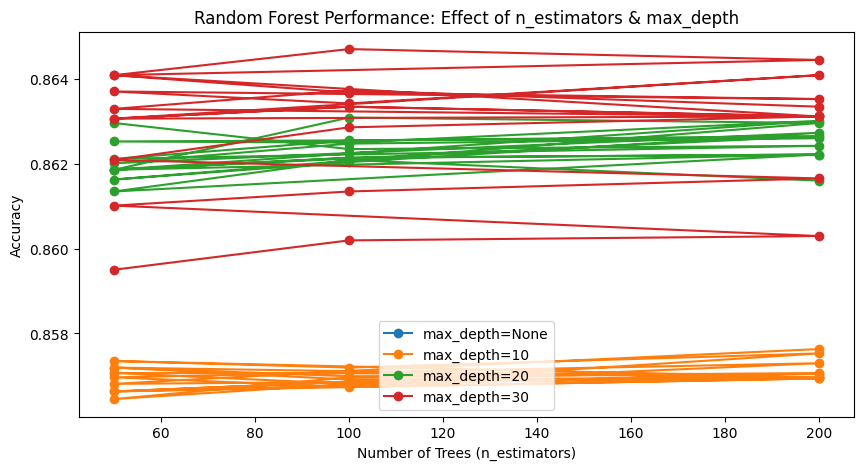

In [49]:
# Plot effect of n_estimators and max_depth
plt.figure(figsize=(10, 5))
for depth in [None, 10, 20, 30]:
    subset = results[results['param_classifier__max_depth'] == depth]
    plt.plot(subset['param_classifier__n_estimators'], subset['mean_test_score'], marker='o', label=f'max_depth={depth}')

plt.xlabel('Number of Trees (n_estimators)')
plt.ylabel('Accuracy')
plt.title('Random Forest Performance: Effect of n_estimators & max_depth')
plt.legend()
plt.show()

## 🧠 Part 5: Model Comparison and Optimization
- Compare all models using Accuracy, Precision, Recall, and F1-score.
- **Reflect:**
   - Which model performed best?
   - How did tuning improve performance?
   - What trade-offs (e.g., overfitting vs. underfitting) did you observe?

👉 **Question:** Summarize which model you would choose for this dataset and why.

## ⭐ Stretch Goal (Optional):
- Use **GridSearchCV** or **RandomizedSearchCV** to fully optimize one model and retrieve best parameters and best model for each.
- Visualize **feature importance** (especially for Decision Tree/Random Forest).

👉 **Bonus Question:** Did advanced tuning or feature importance insights change your final model choice?



```
# This is formatted as code
```

